## User Behavior Classification

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Import Dataset

In [3]:
users_df = pd.read_csv('user_behavior_dataset.csv')
users_df.head(3)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2


#### Shape

In [4]:
users_df.shape

(700, 11)

#### Columns

In [5]:
users_df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

#### Dataframe Information

In [7]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


## Data Cleaning

#### Remove Duplicates

In [6]:
users_df.duplicated().sum()

0

#### Nulls

In [8]:
users_df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

#### Uniques values

In [10]:
users_df['Device Model'].unique()

array(['Google Pixel 5', 'OnePlus 9', 'Xiaomi Mi 11', 'iPhone 12',
       'Samsung Galaxy S21'], dtype=object)

In [11]:
users_df['User Behavior Class'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [12]:
users_df['Operating System'].unique()

array(['Android', 'iOS'], dtype=object)

In [13]:
users_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

## Statistics

#### Quantiles

In [16]:
users_df.drop(columns=['User ID', 'User Behavior Class']).describe()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857
std,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916
min,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000
25%,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000
50%,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000
75%,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000
max,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000


#### Correlations

In [19]:
users_df.select_dtypes(include='number').drop(columns=['User ID', 'User Behavior Class']).corr()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age
App Usage Time (min/day),1.000000,0.950333,0.956385,0.955253,0.942308,0.004382
Screen On Time (hours/day),0.950333,1.000000,0.948983,0.946975,0.941322,0.017232
Battery Drain (mAh/day),0.956385,0.948983,1.000000,0.961853,0.932276,-0.002722
Number of Apps Installed,0.955253,0.946975,0.961853,1.000000,0.934800,0.004034
Data Usage (MB/day),0.942308,0.941322,0.932276,0.934800,1.000000,0.003999
Age,0.004382,0.017232,-0.002722,0.004034,0.003999,1.000000


## EDA

#### Columns : 'App Usage Time (min/day)','Screen On Time (hours/day)', 'Battery Drain (mAh/day)' 'Number of Apps Installed'  'Data Usage (MB/day), 'Age'

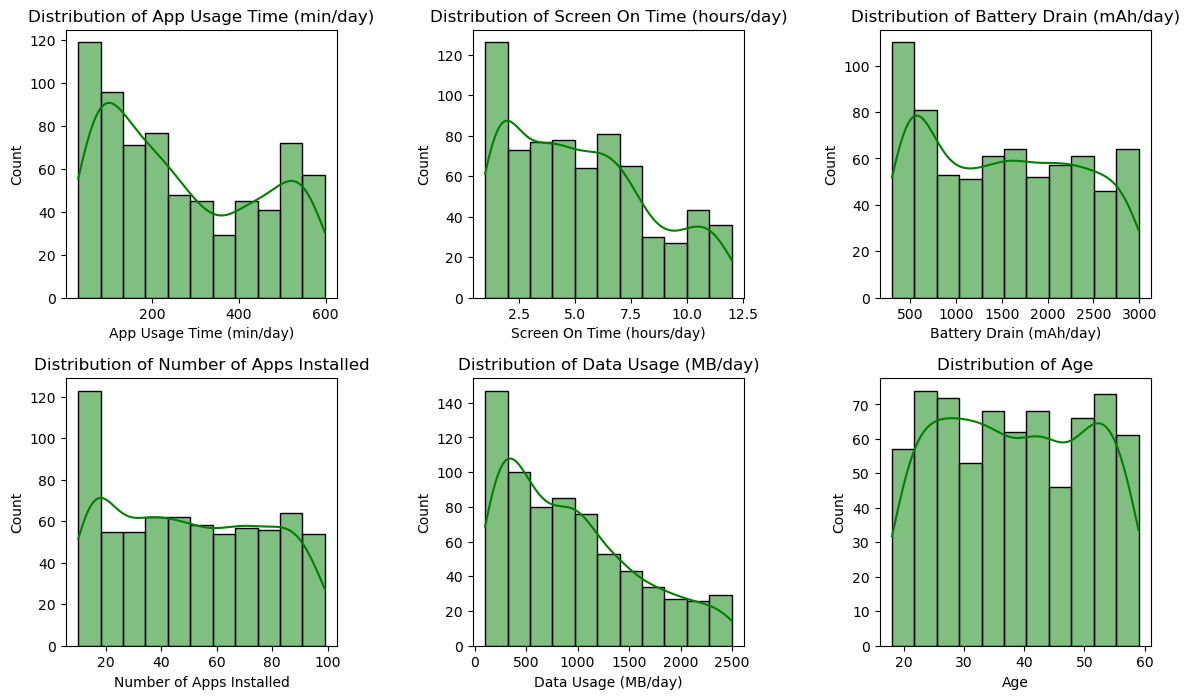

In [25]:
columns = ['App Usage Time (min/day)', 'Screen On Time (hours/day)','Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age']

plt.subplots(2,3,figsize=(14,8))
plt.subplots_adjust(wspace=0.5, hspace=0.3)

k = 1
for i in columns:
    plt.subplot(2,3,k)
    sns.histplot(x = i, data = users_df, kde = True, color='green')
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

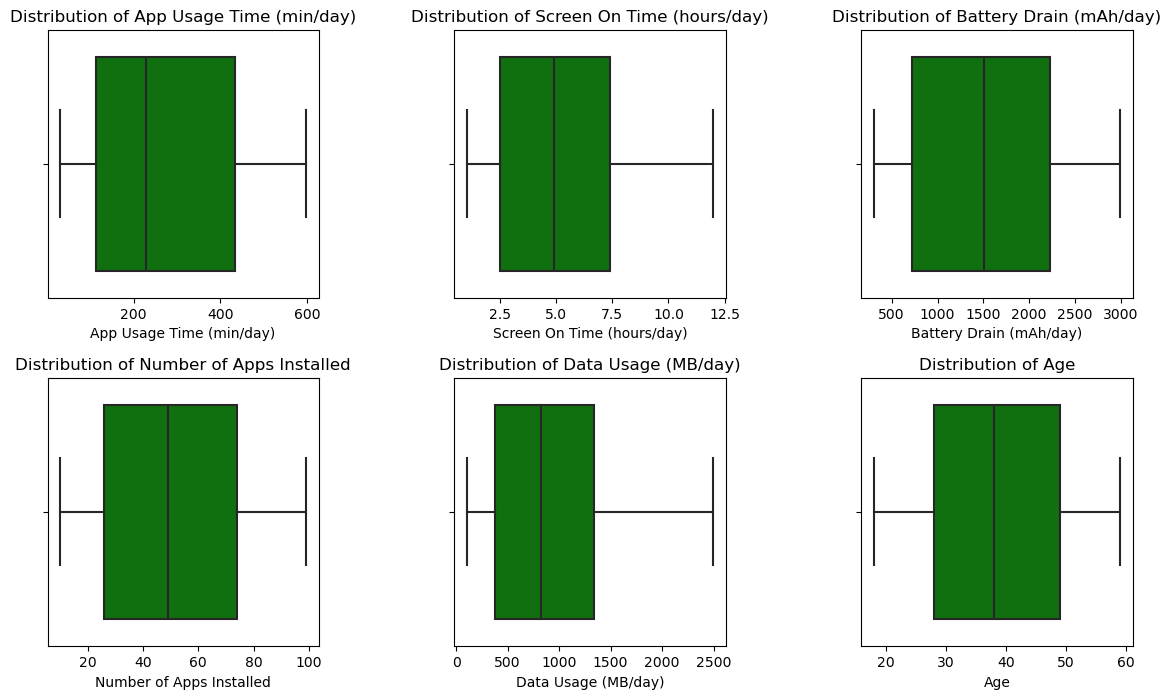

In [26]:
columns = ['App Usage Time (min/day)', 'Screen On Time (hours/day)','Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age']

plt.subplots(2,3,figsize=(14,8))
plt.subplots_adjust(wspace=0.5, hspace=0.3)

k = 1
for i in columns:
    plt.subplot(2,3,k)
    sns.boxplot(x = i, data = users_df, color='green')
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

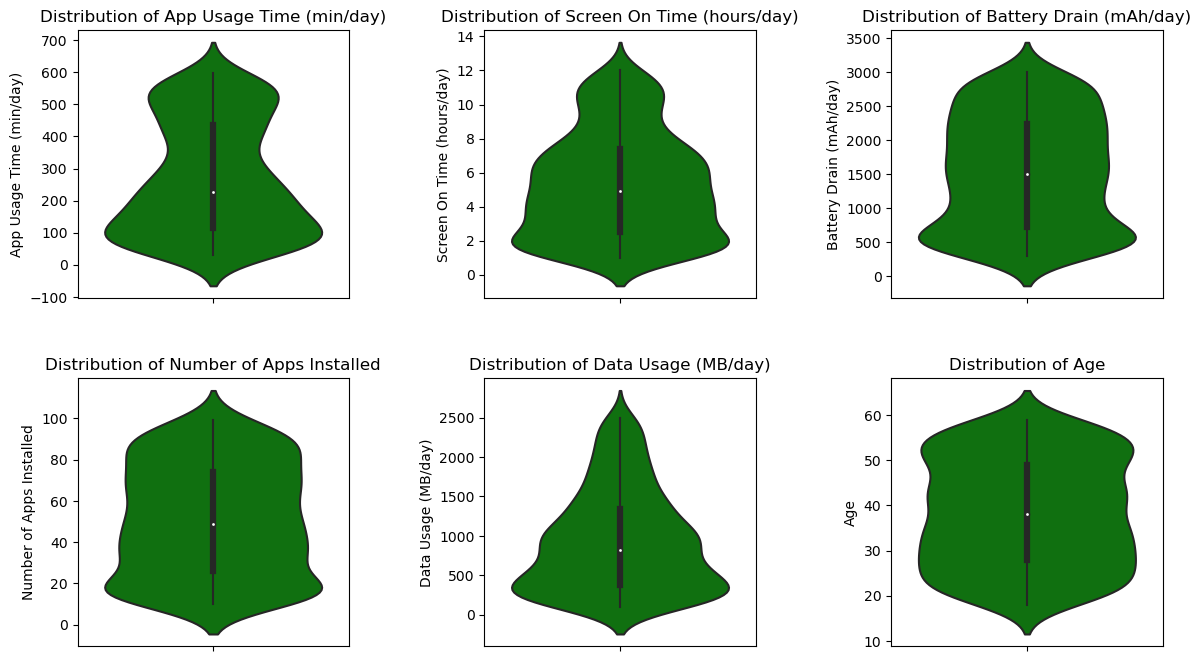

In [27]:
columns = ['App Usage Time (min/day)', 'Screen On Time (hours/day)','Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age']

plt.subplots(2,3,figsize=(14,8))
plt.subplots_adjust(wspace=0.5, hspace=0.3)

k = 1
for i in columns:
    plt.subplot(2,3,k)
    sns.violinplot(y = i, data = users_df, color='green')
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

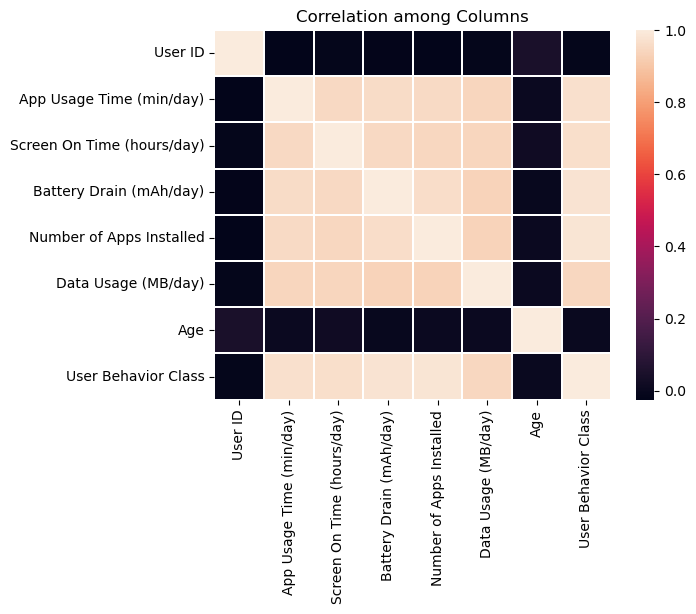

In [69]:
corrmatrix = users_df.corr(numeric_only=True)
sns.heatmap(data = corrmatrix, linewidths=.2, fmt='.2f')
plt.title('Correlation among Columns')
plt.show()

#### Columns : Device Model, Operating System, Gender, User Behavior Class

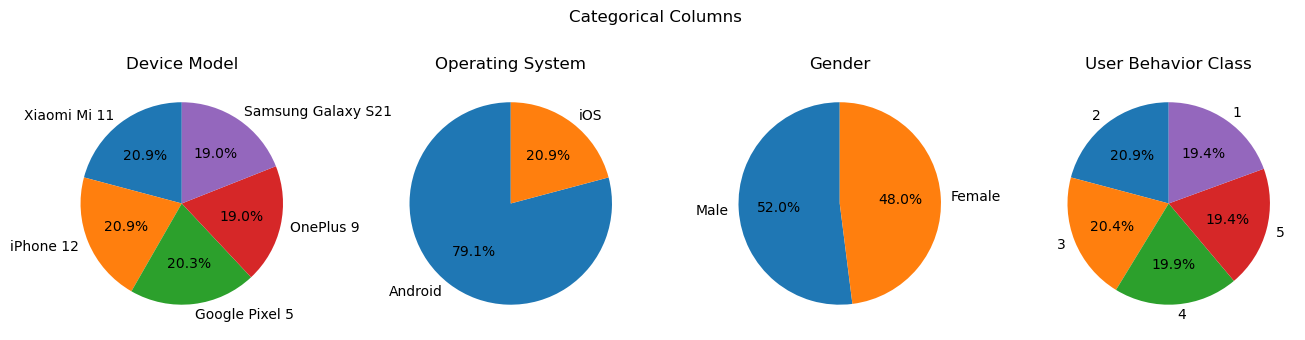

In [74]:
columns = ['Device Model', 'Operating System', 'Gender', 'User Behavior Class']
plt.subplots(1,4,figsize=(16,4))
plt.subplots_adjust(wspace=0.3)

k = 1
for i in columns:
    col_dict = dict(users_df[i].value_counts())
    plt.subplot(1,4,k)
    plt.pie(x = col_dict.values(), labels=col_dict.keys(), autopct='%1.1f%%', startangle=90)
    plt.title(f'{i}')
    k += 1

plt.suptitle('Categorical Columns')
plt.show()

## Data Preprocessing

#### Column Transformer

In [81]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

ct = ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), 
                                      ['Device Model', 'Operating System', 'Gender']), 
                                     ('scaler', MinMaxScaler(), ['App Usage Time (min/day)', 'Screen On Time (hours/day)','Battery Drain (mAh/day)',
                                                                   'Number of Apps Installed', 'Data Usage (MB/day)', 'Age'])],
                       remainder='drop', sparse_threshold=0)
ct

ColumnTransformer(sparse_threshold=0,
                  transformers=[('onehot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Device Model', 'Operating System',
                                  'Gender']),
                                ('scaler', MinMaxScaler(),
                                 ['App Usage Time (min/day)',
                                  'Screen On Time (hours/day)',
                                  'Battery Drain (mAh/day)',
                                  'Number of Apps Installed',
                                  'Data Usage (MB/day)', 'Age'])])

## Data Splitting

In [77]:
X = users_df.drop(columns=['User ID', 'User Behavior Class'])
Y = users_df['User Behavior Class']
X.shape, Y.shape

((700, 9), (700,))

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((560, 9), (560,))

## Model Selection

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, ComplementNB, GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

models = {
    'log_reg': LogisticRegression(),
    'svm': SVC(),
    'knn': KNeighborsClassifier(),
    'mnb': MultinomialNB(),
    'cnb': CategoricalNB(),
    'comp_nb': ComplementNB(),
    'gnb': GaussianNB(),
    'bnb': BernoulliNB(),
    'dec_tree': DecisionTreeClassifier(),
    'random': RandomForestClassifier(),
    'extra': ExtraTreesClassifier(),
    'gbm': GradientBoostingClassifier(),
    'hgbm': HistGradientBoostingClassifier()
}

In [85]:
from sklearn.model_selection import cross_val_score

scores = pd.DataFrame(columns=['Accuracy', 'Mean_Accuracy'], index=models.keys())

X_pr = ct.fit_transform(X)
for i in models.keys():
    s = cross_val_score(models[i], X_pr, Y, cv = 5)
    scores.loc[i, 'Accuracy'] = np.round(s, 2)
    scores.loc[i, 'Mean_Accuracy'] = np.round(s.mean(), 2)

scores.sort_values(by='Mean_Accuracy', ascending=False)

,Accuracy,Mean_Accuracy
svm,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.0
gnb,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.0
dec_tree,"[0.99, 1.0, 1.0, 1.0, 1.0]",1.0
random,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.0
extra,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.0
gbm,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.0
hgbm,"[1.0, 1.0, 1.0, 0.99, 0.99]",1.0
log_reg,"[0.99, 0.99, 0.99, 0.98, 1.0]",0.99
knn,"[0.96, 0.94, 0.95, 0.97, 0.96]",0.96
mnb,"[0.51, 0.54, 0.52, 0.51, 0.53]",0.52


## Model Building

In [86]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps = [('transformer', ct), ('svm', SVC())])

pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Device Model',
                                                   'Operating System',
                                                   'Gender']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['App Usage Time (min/day)',
                                                   'Screen On Time (hours/day)',
                                                   'Battery Drain (mAh/day)',
                                                   'Number of Apps Installed',
                                                   'Data Usage (MB/day)',
                                                   'Age'])])),
                ('svm', SVC())])

## Model Evaluation

In [88]:
from sklearn.metrics import precision_score, recall_score

y_pred = pipe.predict(X_test)

print(f'Accuracy: {pipe.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_pred, average='micro')}')
print(f'Recall: {recall_score(y_test, y_pred, average='micro')}')

SyntaxError: f-string: unmatched '(' (3832444982.py, line 6)